# DATA 240-21, Fall 2024
# Assignment #2

## NOTE: Please do not use any package/library including scikit-learn library except NumPy, Pandas, and Matplotlib. 

# 1. (3 pts) Implanting K-means clustering algorithm 

### Please download cluster_data1.csv. 

### K-means algorithm is a method to automatically cluster similar data examples together. K-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments until they converge. 

### Let’s assume K=3. Please implement K-means clustering algorithm from scratch. Put random seed as ‘123’. Please plot the location of k centroids and their assignment for each cluster in 2D with different colors to distinguish each cluster and its centroid for the first 5 steps (the initial setting of the centroids, Then, after iteration 1/2/3/4). In your plot, set x-axis as ‘X1’ and y-axis as ‘X2’ as the below figure

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("cluster_data1.csv")
df.describe()

,X1,X2,X3,X4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.head()

,X1,X2,X3,X4
0,6.7,3.0,5.0,1.7
1,6.3,2.9,5.6,1.8
2,5.6,3.0,4.5,1.5
3,7.6,3.0,6.6,2.1
4,6.0,3.4,4.5,1.6


In [15]:
# Distance functions
def euclidean_distance(x1, x2):
    """Euclidean distance: sqrt(sum((x1 - x2)^2))"""
    return np.sqrt(np.sum((x1 - x2) ** 2))

def squared_euclidean_distance(x1, x2):
    """Squared Euclidean distance: sum((x1 - x2)^2)"""
    return np.sum((x1 - x2) ** 2)
    
def manhattan_distance(x1, x2):
    """Manhattan distance: sum(abs(x1 - x2))"""
    return np.sum(np.abs(x1 - x2))

def minkowski_distance(x1, x2, p=3):
    """Minkowski distance: (sum(abs(x1 - x2)^p))^(1/p)"""
    return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)

def chebyshev_distance(x1, x2):
    """Chebyshev distance: max(abs(x1 - x2))"""
    return np.max(np.abs(x1 - x2))

 # Helper function to compute the distance dynamically based on self.distance
def compute_distance_bw_points(distance, x1, x2):
    if distance == "euclidean":
        return euclidean_distance(x1, x2)
    elif distance == "manhattan":
        return manhattan_distance(x1, x2)
    elif distance == "minkowski":
        return minkowski_distance(x1, x2, p=3)  # Default p=3, you can modify this if needed
    elif distance == "chebyshev":
        return chebyshev_distance(x1, x2)
    else:
        raise ValueError(f"Unknown distance metric: {self.distance}")

Parameters : k = 3, iteration = 20, random_state = 123, distance_func = 'euclidean'


/var/folders/l2/k_0hhyfd76b__51kf1m_vk_c0000gn/T/ipykernel_11121/1097661413.py:99: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', num_classes)


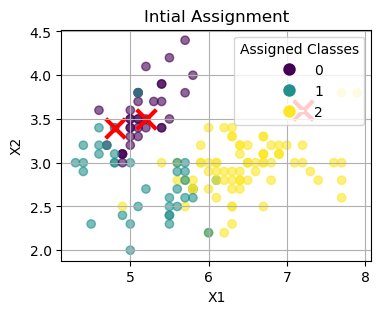

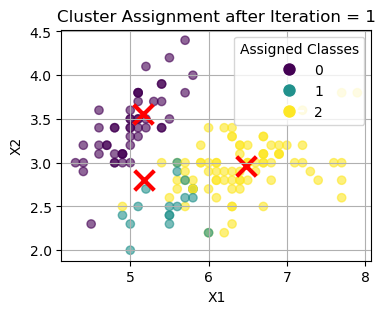

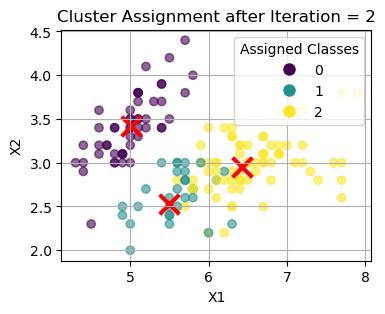

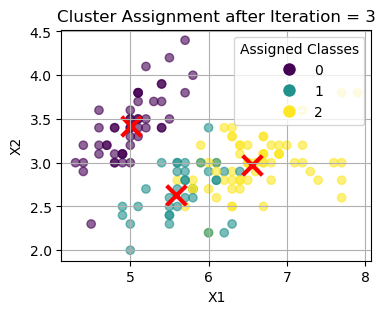

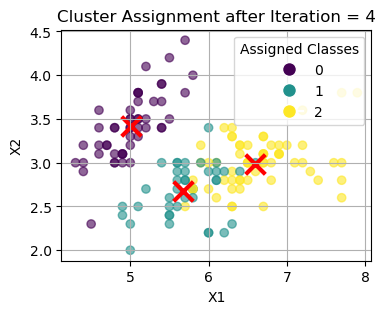

Converged after 11 iterations.


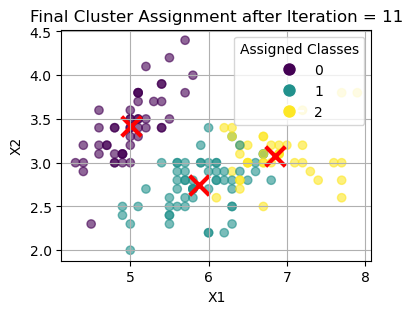

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class KMeans:
    
    def __init__(self, k=3, n_plots=4, iteration=5, distance_func='euclidean', random_state=123,):
        """
        
            :param k: Number of clusters (K).
            :param n_plots: Number of top plots.
            :param iteration: Maximum number of iterations.
            :param random_state: Seed for random number generator.
        """
        self.k = k
        self.iteration = iteration
        self.n_plots = n_plots
        self.distance_func = distance_func
        self.random_state = random_state
        np.random.seed(self.random_state)
        print(f"Parameters : {k = }, {iteration = }, {random_state = }, {distance_func = }")
        self.centroids = None

    # Initialize centroids randomly from the data points
    def initialize_centroids(self, X):
        indices = np.random.RandomState(self.random_state).choice(X.shape[0], self.k, replace=False)
        return X[indices]
            
    # Compute the distance between each data point and the centroids
    def compute_distances(self, X, centroids):
        num_points = X.shape[0]
        distances = np.zeros((num_points, self.k))
        for i in range(self.k):
            distances[:, i] = np.array([compute_distance_bw_points(self.distance_func, x, centroids[i]) for x in X])
        return distances
    

    # Assign each data point to the nearest centroid
    def assign_clusters(self, distances):
        return np.argmin(distances, axis=1)

    # Update the centroids based on the mean of the points assigned to each centroid
    def update_centroids(self, X, labels):
        centroids = np.zeros((self.k, X.shape[1]))
        for k in range(self.k):
            centroids[k, :] = X[labels == k].mean(axis=0)
        return centroids

    # KMeans clustering function
    def fit(self, X):
        # Step 1: Initialize centroids
        self.centroids = self.initialize_centroids(X)
        
        for i in range(0, self.iteration+1):
            # Step 2: Compute distances and assign clusters
            distances = self.compute_distances(X, self.centroids)
            labels = self.assign_clusters(distances)
            
            if i == 0:
                self.plot_clusters(X, self.centroids, labels, title='Intial Assignment')
            elif i <= self.n_plots: 
                self.plot_clusters(X, self.centroids, labels, title=f'Cluster Assignment after Iteration = {i}')

            # Step 3: Update centroids
            new_centroids = self.update_centroids(X, labels)

            # Check for convergence (if centroids don't change)
            if np.all(new_centroids == self.centroids):
                print(f"Converged after {i} iterations.")
                break

            # Update centroids for the next iteration
            self.centroids = new_centroids

        self.plot_clusters(X, self.centroids, labels,  title=f'Final Cluster Assignment after Iteration = {i}')
        return labels, self.centroids

    # # Plotting function
    # def plot_clusters(self, X, centroids, labels, title):
    #     plt.figure(figsize=(4, 3))
    #     plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.5, s=50)
    #     plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
    #     plt.title(title)
    #     plt.xlabel('X1')
    #     plt.ylabel('X2')
    #     plt.grid(True)
    #     plt.show()

    # Plotting function
    def plot_clusters(self, X, centroids, labels, title):
        plt.figure(figsize=(4, 3))
        # Define a discrete colormap
        # cmap = plt.cm.get_cmap('viridis', num_classes)
        # plt.scatter(X[:, 0], X[:, 1], c=labels,  marker='o', alpha=0.5, s=50)
        # plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)

        class_labels = np.unique(labels)
        num_classes = len(class_labels)
        cmap = plt.cm.get_cmap('viridis', num_classes)
        scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap, marker='o', alpha=0.6)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
        handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=10) for i in range(num_classes)]
        
        plt.legend(handles, class_labels, title='Assigned Classes', loc='upper right')
        
        plt.title(title)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.grid(True)
        plt.show()



X = df.values
kmeans = KMeans(k=3, n_plots=4, iteration=20)
k_means_labels, k_means_centroids = kmeans.fit(X)

In [41]:
from collections import Counter
print(Counter(kmeans_plus_plus_labels))
print(k_means_centroids)

Counter({0: 61, 2: 50, 1: 39})
[[5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


# 2. (3 pts) Implanting K-means++ clustering algorithm and finding K 

### The converged solution may not always be ideal and depends on the initial setting of the centroids. To address this issue, K-means++ was introduced. You should implement K-means++ algorithm as described during the class.

### Please implement K-means++ algorithm from scratch. Put random seed as ‘123’. Please plot the location of k centroids and their assignment for each cluster in 2D with different colors to distinguish each cluster and its centroid for the first 5 steps (the initial setting of the centroids, Then, after iteration 1/2/3/4). In your plot, set x-axis as ‘X1’ and y-axis as ‘X2’ as the above figure.

/var/folders/l2/k_0hhyfd76b__51kf1m_vk_c0000gn/T/ipykernel_11121/1849541655.py:97: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', num_classes)


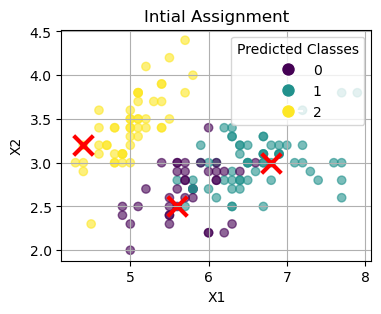

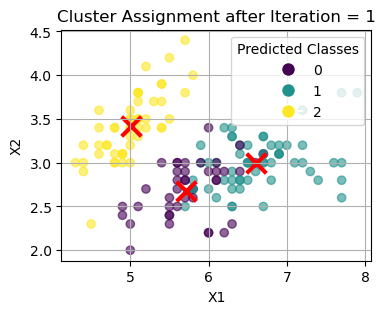

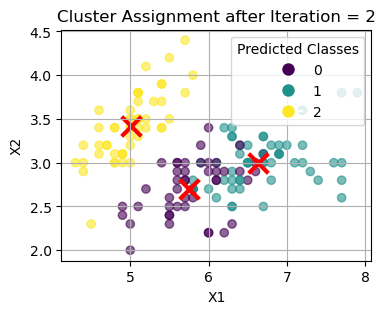

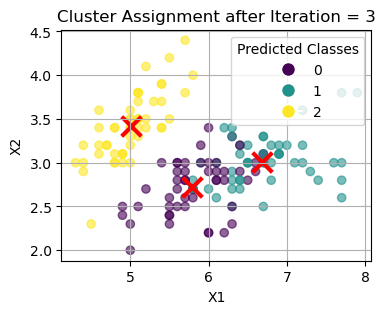

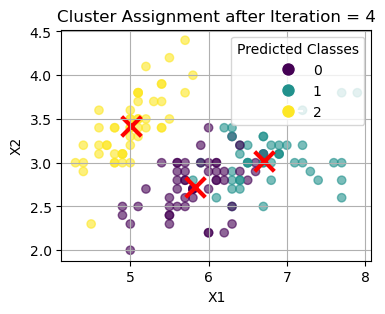

Converged after 8 iterations.


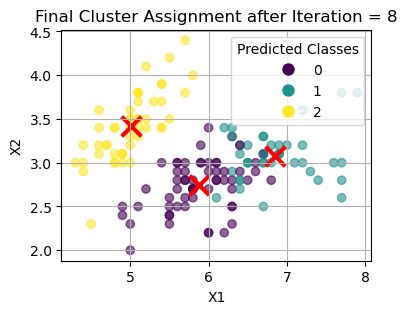

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class KMeansPlusPlus:
    
    def __init__(self, k=3, n_plots=4, iteration=5, distance_func='euclidean', random_state=123):
        """
        :param k: Number of clusters (K).
        :param max_iters: Maximum number of iterations.
        :param random_state: Seed for random number generator.
        """
        self.k = k
        self.iteration = iteration
        self.n_plots = n_plots
        self.distance_func = distance_func
        self.random_state = random_state
        np.random.seed(self.random_state)


    # TODO - K-means++ initialization of centroids
    def initialize_centroids(self, X):
        centroids = []
        # Randomly choose the first centroid
        idx = np.random.RandomState(self.random_state).choice(X.shape[0])
        centroids.append(X[idx])

        # Choose remaining centroids
        for _ in range(1, self.k):
            distances = np.array([min(np.linalg.norm(x - c)**2 for c in centroids) for x in X])
            probabilities = distances / distances.sum()
            cumulative_probabilities = np.cumsum(probabilities)
            idx = np.searchsorted(cumulative_probabilities, np.random.rand())
            centroids.append(X[idx])

        self.centroids = np.array(centroids)
        return self.centroids

    # Compute the distance between each data point and the centroids
    def compute_distances(self, X, centroids):
        distances = np.zeros((X.shape[0], self.k))
        for i in range(self.k):
            distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)
        return distances

    # Assign each data point to the nearest centroid
    def assign_clusters(self, distances):
        return np.argmin(distances, axis=1)

    # Update the centroids based on the mean of the points assigned to each centroid
    def update_centroids(self, X, labels):
        centroids = np.zeros((self.k, X.shape[1]))
        for k in range(self.k):
            centroids[k, :] = X[labels == k].mean(axis=0)
        return centroids

    # KMeans clustering function
    def fit(self, X):
        # Step 1: Initialize centroids using K-means++ method
        self.centroids = self.initialize_centroids(X)

        for i in range(0, self.iteration + 1):
            # Step 2: Compute distances and assign clusters
            distances = self.compute_distances(X, self.centroids)
            labels = self.assign_clusters(distances)

            if i == 0:
                self.plot_clusters(X, self.centroids, labels, title='Intial Assignment')
            elif i <= self.n_plots: 
                self.plot_clusters(X, self.centroids, labels, title=f'Cluster Assignment after Iteration = {i}')
            
            # Step 3: Update centroids
            new_centroids = self.update_centroids(X, labels)

            # Check for convergence (if centroids don't change)
            if np.all(new_centroids == self.centroids):
                print(f"Converged after {i} iterations.")
                break

            # Update centroids for the next iteration
            self.centroids = new_centroids

        self.plot_clusters(X, self.centroids, labels, title=f'Final Cluster Assignment after Iteration = {i}')

        return labels, self.centroids

    # Plotting function
    def plot_clusters(self, X, centroids, labels, title):
        plt.figure(figsize=(4, 3))
        # Define a discrete colormap
        # cmap = plt.cm.get_cmap('viridis', num_classes)
        # plt.scatter(X[:, 0], X[:, 1], c=labels,  marker='o', alpha=0.5, s=50)
        # plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)

        class_labels = np.unique(labels)
        num_classes = len(class_labels)
        cmap = plt.cm.get_cmap('viridis', num_classes)
        scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap, marker='o', alpha=0.6)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
        handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=10) for i in range(num_classes)]
        
        plt.legend(handles, class_labels, title='Assigned Classes', loc='upper right')
        
        plt.title(title)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.grid(True)
        plt.show()


# Initialize the KMeansPlusPlus object
kmeans_plus_plus = KMeansPlusPlus(k=3, iteration=15)

# Fit the KMeans++ algorithm to the data
kmeans_plus_plus_labels, kmeans_plus_plus_centroids = kmeans_plus_plus.fit(X)


In [46]:
from collections import Counter
print(Counter(kmeans_plus_plus_labels))
print(kmeans_plus_plus_centroids)

Counter({0: 61, 2: 50, 1: 39})
[[5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]]


Observations - 

- K-Means++ intial cluster assignment is much better and well distributed where K-Means cluster initialization is randon and the initials two cluster are very close to each other.
- As we can see this K-Means++ algorithm converges faster than the K-Means algorithm.
- The K-Means algorithm converges in 11 iterations but K-Means++ algorithm converges in 8 iterations.


# 3. (4 pts) Implanting KNN classification 

### Please download cluster_data2.csv. 

### Please implement KNN classification algorithm from scratch. Please assign class for each data point based on the result of problem #2 using K-NN method.

In [48]:
df_test = pd.read_csv("cluster_data2.csv")
df_test.describe()

,X1,X2,X3,X4
count,15.000000,15.000000,15.000000,15.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.691165,0.295074,1.771032,0.761923
min,4.860000,2.650000,1.420000,0.190000
25%,5.140000,2.860000,1.510000,0.280000
50%,5.850000,2.960000,4.270000,1.340000
75%,6.500000,3.320000,5.415000,1.935000
max,6.740000,3.650000,5.770000,2.170000


     X1    X2    X3    X4  KNN_Predicted_Class
0  5.21  3.65  1.42  0.25                    2
1  5.07  3.41  1.43  0.19                    2
2  5.85  2.65  4.14  1.27                    0
3  5.64  2.73  4.03  1.23                    0
4  6.55  2.90  5.54  2.05                    1


/var/folders/l2/k_0hhyfd76b__51kf1m_vk_c0000gn/T/ipykernel_11121/1032385786.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', num_classes)


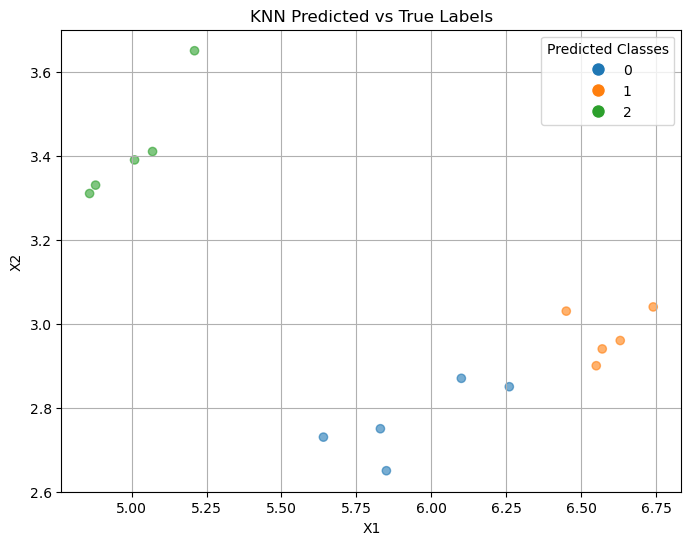

In [90]:
import numpy as np
from collections import Counter
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap



# KNN classifier class
class KNN:
    def __init__(self, k=3, distance_func="euclidean"):
        self.k = k
        self.distance_func = distance_func
    
    # Fit method stores the training data
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    
    # Helper function to predict the class of a single instance
    def _predict(self, x):
        # Compute the distance between the test point and all training points
        distances = [compute_distance_bw_points(self.distance_func, x, x_train) for x_train in self.X_train]
        
        # Get the indices of the k-nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Get the labels of the k-nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Return the most common label among the nearest neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    # Predict method for the entire test set
    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)
            
    
    # Method to plot the classified points along with their true classes
    def plot_predictions(self, X, y, title="KNN Classification"):
        plt.figure(figsize=(8, 6))
        class_labels = np.unique(y)
        num_classes = len(class_labels)
        
        cmap = plt.cm.get_cmap('nipy_spectral', num_classes)
        color_mapping = {
            0: '#1f77b4',  # Class 0: Blue
            1: '#ff7f0e',  # Class 1: Orange
            2: '#2ca02c'   # Class 2: Green
        }
        
        # Create a ListedColormap from the color mapping
        cmap = ListedColormap([color_mapping[i] for i in range(len(color_mapping))])

        scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, marker='o', alpha=0.6)
        handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=10) for i in range(num_classes)]
        
        plt.legend(handles, class_labels, title='Predicted Classes', loc='upper right')
        
        # Add titles and labels
        plt.title(title)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.grid(True) 
        plt.show()




# Apply KNN using the cluster labels obtained from KMeans++
# In this case, we'll use KNN to classify the data points based on the clusters

knn = KNN(k=3)
knn.fit(X, kmeans_plus_plus_labels)

X_test = df_test.values
# Now, classify all data points using KNN based on the cluster labels
predictions = knn.predict(X_test)

# Add predictions to the DataFrame to see the result
df_test_output = df_test.copy()
df_test_output['KNN_Predicted_Class'] = predictions

# Display first few rows to check the predicted labels
print(df_test_output.head())

knn.plot_predictions(X_test, predictions, title="KNN Predicted vs True Labels")
